# TIME SERIES ANALYSIS OF THE CRYPTO(BTC) PRICES-

## Importing necessary Libraries-

In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

## Traversing Directory Path for Accessing the CSV Data File-

In [2]:
rss_path = r"E:\Dutech Internship\Time Series Analysis\Proj1\RSS"
file = r"bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv"
path2file = join(rss_path, file)

## Reading the CSV File and Storing it in a Data Frame-

In [3]:
df = pd.read_csv(path2file, index_col='Timestamp')
df

E:\ANACONDA\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1541894100,6348.54,6348.54,6348.54,6348.54,0.007997,50.769274,6348.540000
1541894160,6348.54,6349.01,6348.54,6349.01,0.011729,74.466671,6348.936090
1541894220,6349.01,6349.01,6349.01,6349.01,0.068436,434.503642,6349.010000


In [4]:
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

## Plotting of Uncleaned Data for RDA (Raw Data Analysis)-

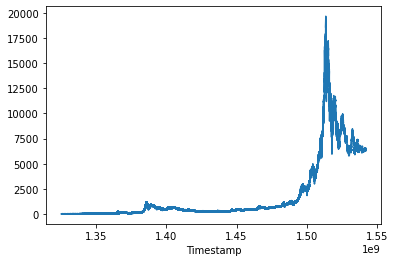

In [5]:
data = df.loc[:, 'Weighted_Price']
data.plot()
plt.show()

## Data Cleaning-

In [6]:
df.fillna(df.mean(), inplace = True)
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1325317920,4.390000,4.390000,4.39000,4.390000,0.455581,2.000000,4.390000
1325317980,2571.487051,2573.625139,2569.05826,2571.462272,10.924507,23693.494350,2571.319982
1325318040,2571.487051,2573.625139,2569.05826,2571.462272,10.924507,23693.494350,2571.319982
1325318100,2571.487051,2573.625139,2569.05826,2571.462272,10.924507,23693.494350,2571.319982
1325318160,2571.487051,2573.625139,2569.05826,2571.462272,10.924507,23693.494350,2571.319982
...,...,...,...,...,...,...,...
1541894100,6348.540000,6348.540000,6348.54000,6348.540000,0.007997,50.769274,6348.540000
1541894160,6348.540000,6349.010000,6348.54000,6349.010000,0.011729,74.466671,6348.936090
1541894220,6349.010000,6349.010000,6349.01000,6349.010000,0.068436,434.503642,6349.010000


## Plotting a Sample Dataset of certain attribute (CRYPTO'S WEIGHTED PRICE) from above Data Frame for better Visualization- 

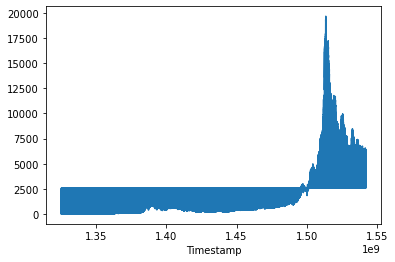

In [7]:
data = df.loc[:, 'Weighted_Price']
data.plot()
plt.show()

## Increasing the Dataset's plots' Dimensions for clarity-

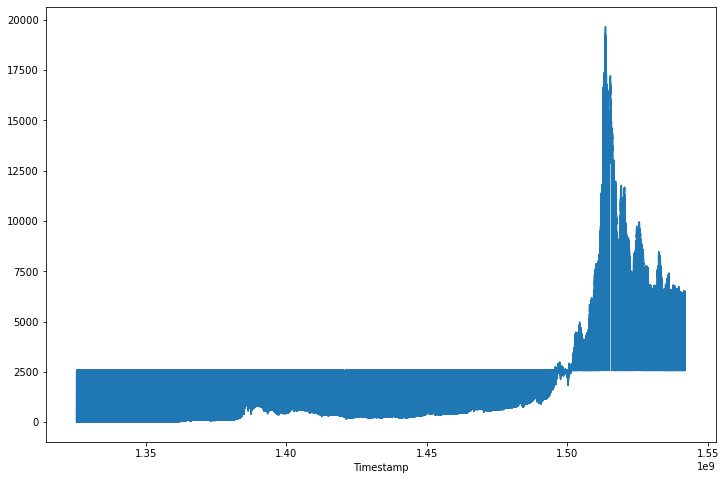

In [8]:
rcParams['figure.figsize'] = 12, 8
data.plot()
plt.show()

## Multiplicative Decomposition of the Time Series-

In [9]:
data_mul_decomp = seasonal_decompose(data, model = 'multiplicative', period = 1)
data_mul_decomp

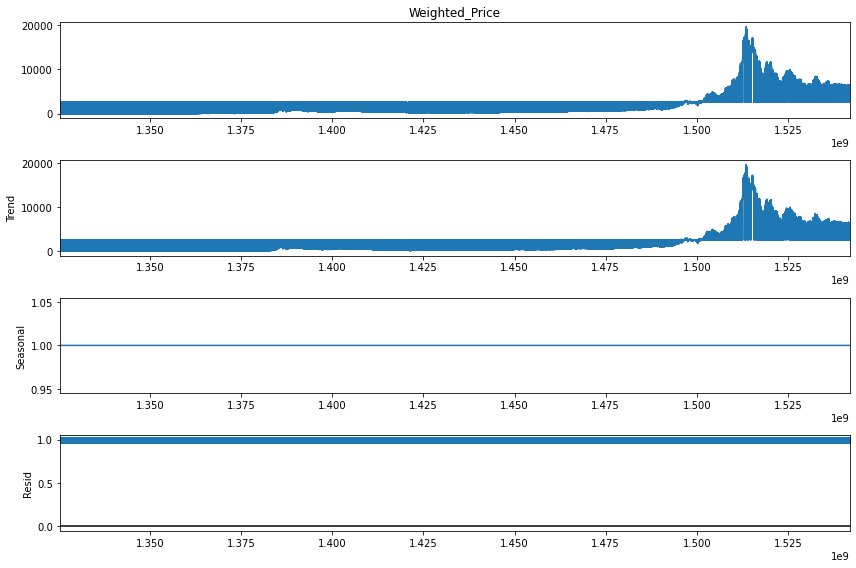

In [10]:
data_mul_decomp.plot()
plt.show()

## Logarithmic Transformation for using Additive Model in place of Multipliative Model- 

In [11]:
data_log = data.copy()
data_log

Timestamp
1325317920       4.390000
1325317980    2571.319982
1325318040    2571.319982
1325318100    2571.319982
1325318160    2571.319982
                 ...     
1541894100    6348.540000
1541894160    6348.936090
1541894220    6349.010000
1541894280    2571.319982
1541894340    6349.214148
Name: Weighted_Price, Length: 3603136, dtype: float64

In [12]:
data_log = np.log(data_log)
data_log

Timestamp
1325317920    1.479329
1325317980    7.852175
1325318040    7.852175
1325318100    7.852175
1325318160    7.852175
                ...   
1541894100    8.755980
1541894160    8.756043
1541894220    8.756054
1541894280    7.852175
1541894340    8.756086
Name: Weighted_Price, Length: 3603136, dtype: float64

## Plotting the Logarithmically Transform Data-

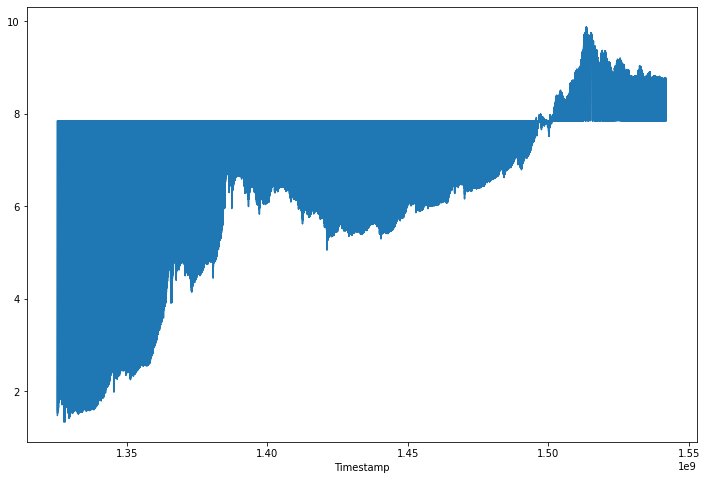

In [13]:
data_log.plot()
plt.show()

## Sub-Plotting for Side-by-Side Comparison of the 2 Plots (Original and Logarithmically Transformed)-

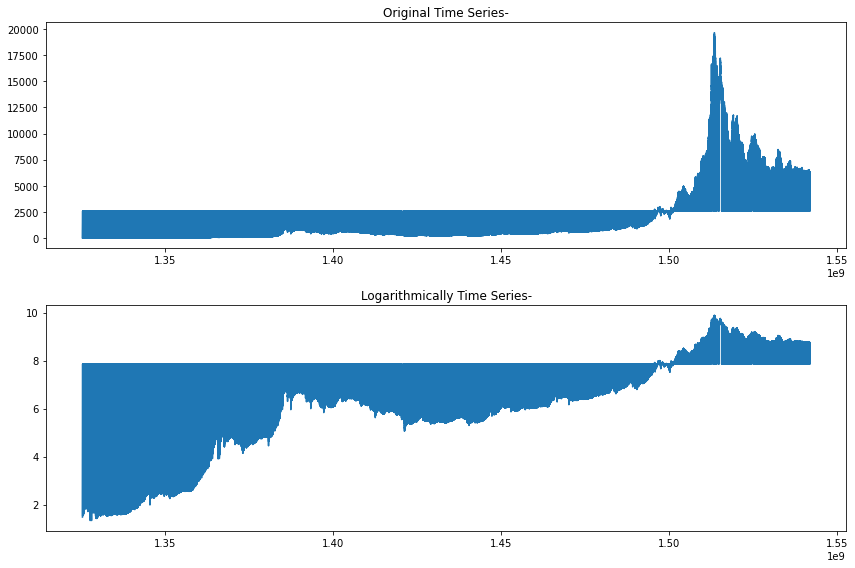

In [14]:
plt.subplot(2, 1, 1)
plt.title('Original Time Series-')
plt.plot(data)

plt.subplot(2, 1, 2)
plt.title('Logarithmically Time Series-')
plt.plot(data_log)

plt.tight_layout()